In [10]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv("C:\\Users\\KShah1\\Downloads\\Time_series_linkedin\\weekly_web_traffic_dataset.csv")


In [11]:
warnings.filterwarnings('ignore')
df.set_index('week_start_date',inplace=True)

In [12]:
print(df.head())

                 weekly_visits  weekly_conversions  weekly_conv_rate
week_start_date                                                     
2022-01-03               10248                 680          0.066354
2022-01-10               10171                 612          0.060171
2022-01-17               10802                 568          0.052583
2022-01-24               11470                 715          0.062337
2022-01-31               10812                 591          0.054661


In [13]:
visits = df['weekly_visits']
conv_rate = df['weekly_conv_rate']

train_visits, test_visits = visits[:-13],visits[-13:]
train_conv, test_conv = conv_rate[:-13],conv_rate[-13:]

steps = len(test_visits)

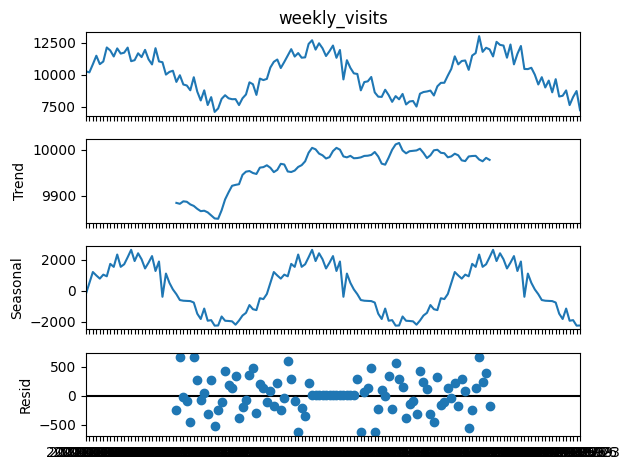

<Figure size 1000x800 with 0 Axes>

In [14]:
decomp = seasonal_decompose(train_visits, model='additive', period=52)
axes = decomp.plot()
fig = plt.figure(figsize=(10, 8))
# rotate and align the x‑labels
for ax in fig.axes:
    ax.tick_params(axis='x', which='both', labelbottom=False)
plt.suptitle('Step 3: Seasonal Decomposition of Weekly Visits')
plt.tight_layout()
plt.show()

In [19]:
arima_visits = ARIMA(train_visits, order=(1,1,1)).fit()
arima_visits_fc = arima_visits.forecast(steps=steps)
print(arima_visits_fc)


arima_conv = ARIMA(train_conv, order=(1,1,1)).fit()
arima_conv_fc = arima_conv.forecast(steps=steps)
print(arima_conv_fc)


2024-09-30    7788.579498
2024-10-07    7636.458652
2024-10-14    7676.454455
2024-10-21    7665.938709
2024-10-28    7668.703522
2024-11-04    7667.976594
2024-11-11    7668.167719
2024-11-18    7668.117468
2024-11-25    7668.130680
2024-12-02    7668.127206
2024-12-09    7668.128120
2024-12-16    7668.127879
2024-12-23    7668.127943
Freq: W-MON, Name: predicted_mean, dtype: float64
2024-09-30    0.043502
2024-10-07    0.043903
2024-10-14    0.043843
2024-10-21    0.043852
2024-10-28    0.043851
2024-11-04    0.043851
2024-11-11    0.043851
2024-11-18    0.043851
2024-11-25    0.043851
2024-12-02    0.043851
2024-12-09    0.043851
2024-12-16    0.043851
2024-12-23    0.043851
Freq: W-MON, Name: predicted_mean, dtype: float64


In [21]:
sarima_visits = SARIMAX(
    train_visits,
    order=(1,1,1),
    seasonal_order=(0,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)
sarima_visits_fc = sarima_visits.forecast(steps=steps)
print(sarima_visits_fc)

sarima_conv = SARIMAX(
    train_conv,
    order=(1,1,1),
    seasonal_order=(0,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)
sarima_conv_fc = sarima_conv.forecast(steps=steps)
print(sarima_conv_fc)


2024-09-30    8440.734746
2024-10-07    8114.982419
2024-10-14    8115.076193
2024-10-21    8086.625796
2024-10-28    7904.768870
2024-11-04    8155.587862
2024-11-11    8474.944379
2024-11-18    8671.693851
2024-11-25    9126.100321
2024-12-02    8905.781906
2024-12-09    8879.033264
2024-12-16    9583.579900
2024-12-23    9188.638149
Freq: W-MON, Name: predicted_mean, dtype: float64
2024-09-30    0.042606
2024-10-07    0.049055
2024-10-14    0.047886
2024-10-21    0.044620
2024-10-28    0.048673
2024-11-04    0.056628
2024-11-11    0.055406
2024-11-18    0.050861
2024-11-25    0.054793
2024-12-02    0.055081
2024-12-09    0.051943
2024-12-16    0.059454
2024-12-23    0.061297
Freq: W-MON, Name: predicted_mean, dtype: float64


In [17]:
print("Forecast Accuracy (MAPE)")
print(f"Visits    – ARIMA: {mean_absolute_percentage_error(test_visits, arima_visits_fc):.3f}, "
      f"SARIMA: {mean_absolute_percentage_error(test_visits, sarima_visits_fc):.3f}")
print(f"ConvRate  – ARIMA: {mean_absolute_percentage_error(test_conv, arima_conv_fc):.3f}, "
      f"SARIMA: {mean_absolute_percentage_error(test_conv, sarima_conv_fc):.3f}")

Forecast Accuracy (MAPE)
Visits    – ARIMA: 0.110, SARIMA: 0.032
ConvRate  – ARIMA: 0.142, SARIMA: 0.095


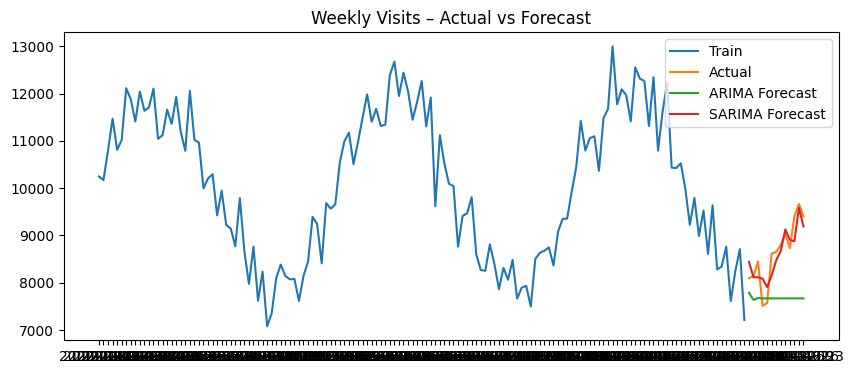

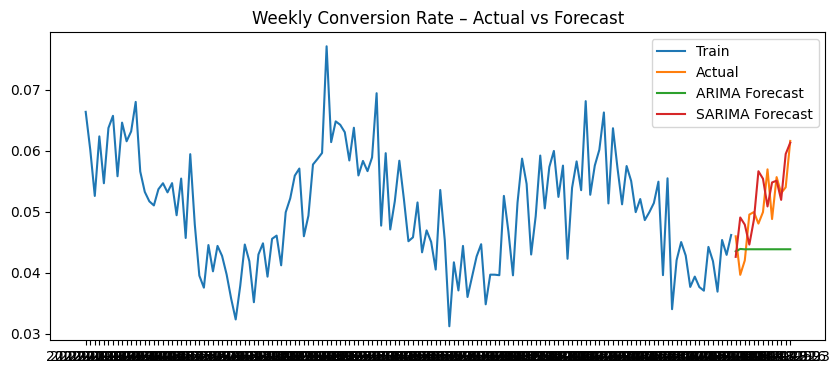

In [18]:
# Step 7: Plot Visits forecast vs. actual
# ---------------------------------------
plt.figure(figsize=(10,4))
plt.plot(train_visits.index, train_visits, label='Train')
plt.plot(test_visits.index, test_visits,   label='Actual')
plt.plot(test_visits.index, arima_visits_fc, label='ARIMA Forecast')
plt.plot(test_visits.index, sarima_visits_fc, label='SARIMA Forecast')
plt.title('Weekly Visits – Actual vs Forecast')
plt.legend()
plt.show()

# Step 8: Plot Conversion Rate forecast vs. actual
# ------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(train_conv.index, train_conv,           label='Train')
plt.plot(test_conv.index,  test_conv,            label='Actual')
plt.plot(test_conv.index,  arima_conv_fc,        label='ARIMA Forecast')
plt.plot(test_conv.index,  sarima_conv_fc,       label='SARIMA Forecast')
plt.title('Weekly Conversion Rate – Actual vs Forecast')
plt.legend()
plt.show()